In [1]:
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('train.csv', delimiter=',')
df.shape

(8000, 14)

In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.nunique()

RowNumber          8000
CustomerId         8000
Surname            2589
CreditScore         286
Geography             3
Gender                2
Age                  48
Tenure                6
Balance            5064
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    7998
Exited                2
dtype: int64

In [5]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0
1,682,France,Female,54,4,62397.41,1,1,0,113088.60,1
2,672,France,Female,31,5,119903.67,1,1,1,132925.17,0
3,592,Spain,Female,40,4,104257.86,1,1,0,110857.33,0
4,753,Spain,Male,42,5,120387.73,1,0,1,126378.57,0


In [6]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

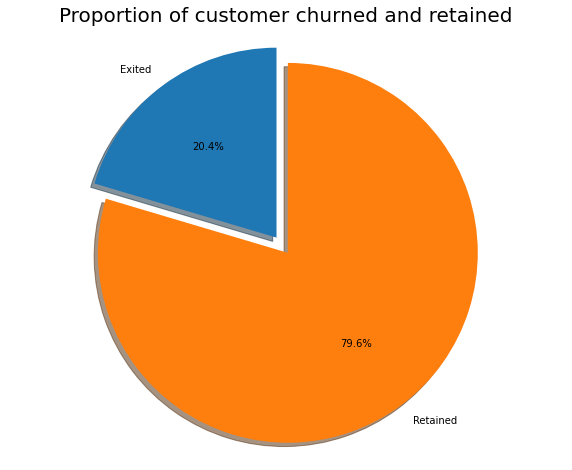

In [7]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow= True,startangle= 90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

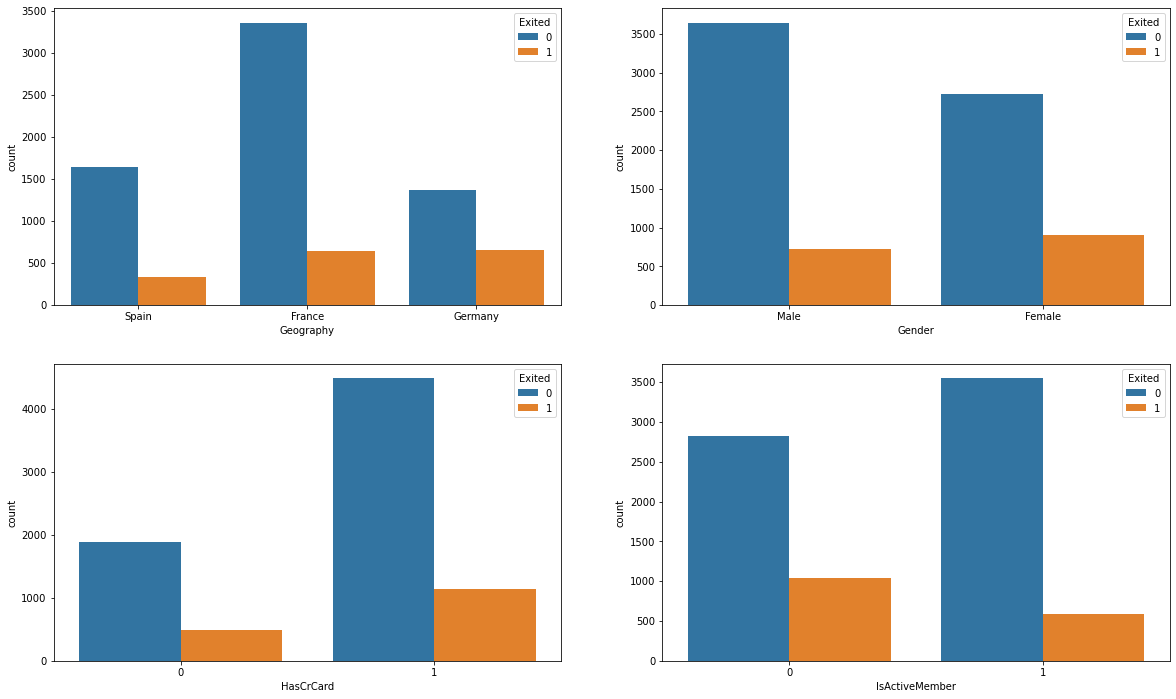

In [8]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

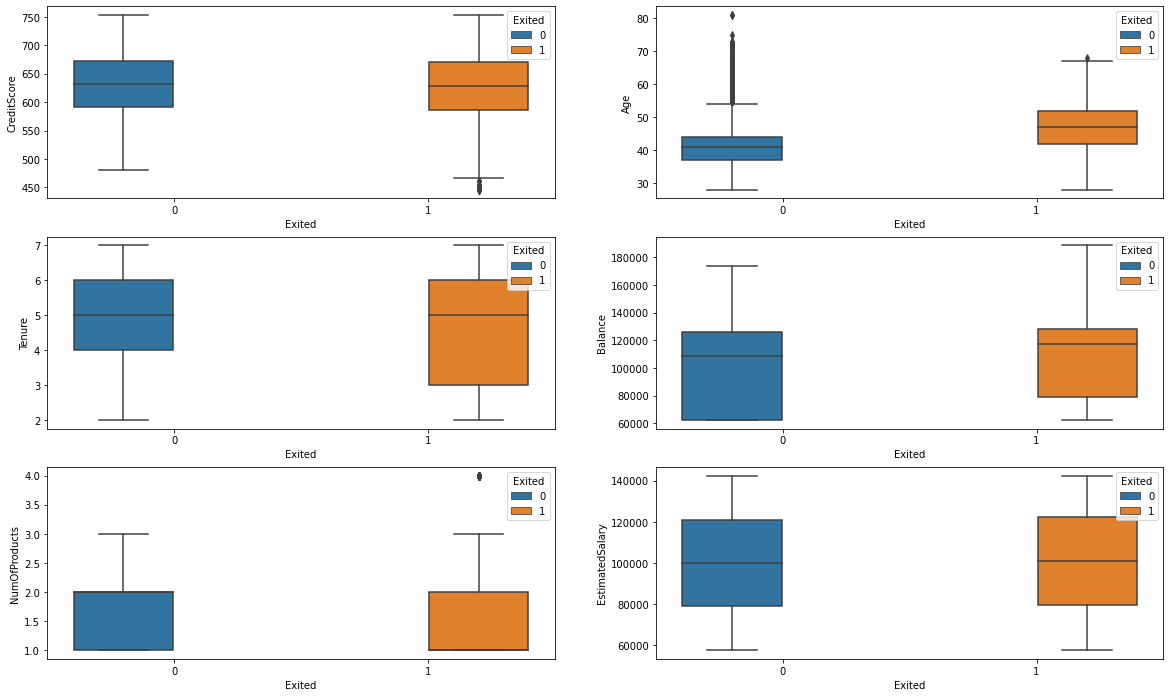

In [9]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

<AxesSubplot:xlabel='Exited', ylabel='CreditScoreGivenAge'>

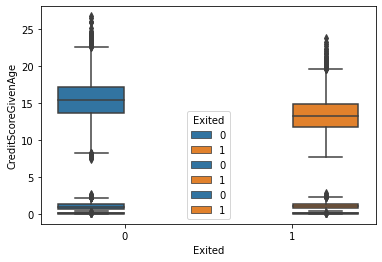

In [10]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)

df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)

df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)
sns.boxplot(y='CreditScoreGivenAge', x = "Exited", hue= "Exited", data= df)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0,1.060186,0.131579,18.947368
1,682,France,Female,54,4,62397.41,1,1,0,113088.60,1,0.551757,0.074074,12.629630
2,672,France,Female,31,5,119903.67,1,1,1,132925.17,0,0.902039,0.161290,21.677419
3,592,Spain,Female,40,4,104257.86,1,1,0,110857.33,0,0.940469,0.100000,14.800000
4,753,Spain,Male,42,5,120387.73,1,0,1,126378.57,0,0.952596,0.119048,17.928571


In [12]:
df_dum = pd.get_dummies(df)
df_dum.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,720,38,5,114051.97,2,0,1,107577.29,0,1.060186,0.131579,18.947368,0,0,1,0,1
1,682,54,4,62397.41,1,1,0,113088.60,1,0.551757,0.074074,12.629630,1,0,0,1,0
2,672,31,5,119903.67,1,1,1,132925.17,0,0.902039,0.161290,21.677419,1,0,0,1,0
3,592,40,4,104257.86,1,1,0,110857.33,0,0.940469,0.100000,14.800000,0,0,1,1,0
4,753,42,5,120387.73,1,0,1,126378.57,0,0.952596,0.119048,17.928571,0,0,1,0,1


In [13]:
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography_France','Geography_Germany','Geography_Spain','Gender_Female','Gender_Male']

In [14]:
df_dum[continuous_vars].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,720,38,5,114051.97,2,107577.29,1.060186,0.131579,18.947368
1,682,54,4,62397.41,1,113088.60,0.551757,0.074074,12.629630
2,672,31,5,119903.67,1,132925.17,0.902039,0.161290,21.677419
3,592,40,4,104257.86,1,110857.33,0.940469,0.100000,14.800000
4,753,42,5,120387.73,1,126378.57,0.952596,0.119048,17.928571


In [15]:
import sklearn.preprocessing as sp

In [16]:
fs = sp.StandardScaler().fit(df_dum[continuous_vars])
result_std = fs.transform(df_dum[continuous_vars])

In [17]:
df_std = pd.DataFrame(result_std,columns=continuous_vars)
df_std.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,1.509906,-0.663721,0.339933,0.428978,0.799546,0.304927,-0.022679,0.625595,1.359897
1,0.866637,1.465241,-0.445812,-1.214512,-0.917139,0.529787,-1.172497,-0.988375,-0.866893
2,0.697356,-1.595141,0.339933,0.615161,-0.917139,1.339115,-0.380331,1.459494,2.322148
3,-0.656894,-0.397600,-0.445812,0.117359,-0.917139,0.438752,-0.293421,-0.260721,-0.101910
4,2.068534,-0.131480,0.339933,0.630562,-0.917139,1.072015,-0.265995,0.273882,1.000806


In [18]:
df_std.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,-6.458306e-16,4.669529e-16,1.600761e-15,2.132183e-16,-3.621270e-16,-2.745859e-16,1.770945e-16,-4.662659e-16,-1.603578e-17
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-3.128400e+00,-1.994322e+00,-2.017300e+00,-1.214512e+00,-9.171394e-01,-1.737316e+00,-1.429913e+00,-2.241897e+00,-2.681964e+00
25%,-6.907500e-01,-6.637205e-01,-4.458117e-01,-1.214512e+00,-9.171394e-01,-8.521702e-01,-7.708689e-01,-7.917118e-01,-6.852105e-01
50%,3.303100e-03,-1.314800e-01,3.399327e-01,3.356468e-01,-9.171394e-01,-1.935742e-03,-1.545519e-01,-3.315327e-02,-3.980908e-02
75%,6.973562e-01,5.338206e-01,1.125677e+00,8.250389e-01,7.995464e-01,8.568359e-01,6.060785e-01,7.254052e-01,6.527823e-01
max,2.068534e+00,5.057865e+00,1.911421e+00,2.797707e+00,4.232918e+00,1.729031e+00,4.039376e+00,3.949279e+00,4.110062e+00


In [19]:
df_dum[cat_vars].head()

,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0,1,0,0,1,0,1
1,1,0,1,0,0,1,0
2,1,1,1,0,0,1,0
3,1,0,0,0,1,1,0
4,0,1,0,0,1,0,1


In [20]:
final_df = pd.concat((df_std,df_dum[cat_vars]),axis= 1)
final_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.509906,-0.663721,0.339933,0.428978,0.799546,0.304927,-0.022679,0.625595,1.359897,0,1,0,0,1,0,1
1,0.866637,1.465241,-0.445812,-1.214512,-0.917139,0.529787,-1.172497,-0.988375,-0.866893,1,0,1,0,0,1,0
2,0.697356,-1.595141,0.339933,0.615161,-0.917139,1.339115,-0.380331,1.459494,2.322148,1,1,1,0,0,1,0
3,-0.656894,-0.397600,-0.445812,0.117359,-0.917139,0.438752,-0.293421,-0.260721,-0.101910,1,0,0,0,1,1,0
4,2.068534,-0.131480,0.339933,0.630562,-0.917139,1.072015,-0.265995,0.273882,1.000806,0,1,0,0,1,0,1


# ensemble learning

In [21]:
data_y = df["Exited"]
data_X = final_df

In [22]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

In [23]:
clf = tree.DecisionTreeClassifier(criterion= 'entropy',max_depth= 8)

In [24]:
bag = BaggingClassifier(base_estimator= clf,n_estimators= 100,max_features= 0.7,n_jobs= -1)

In [25]:
bag.fit(data_X,data_y)

from sklearn.metrics import classification_report
print(classification_report(data_y,  bag.predict(data_X)))
print(bag.score(data_X,data_y))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      6368
           1       0.90      0.48      0.63      1632

    accuracy                           0.88      8000
   macro avg       0.89      0.73      0.78      8000
weighted avg       0.88      0.88      0.87      8000

0.88325


In [26]:
test_data = pd.read_csv("test.csv")
test_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,2209,15623595,Scott,726,France,Female,39,3,62397.41,1,0,0,106139.31
1,9924,15740283,Yegorova,661,France,Male,42,3,130339.64,1,1,0,125776.38
2,4617,15802368,Tan,545,France,Male,34,6,62397.41,2,1,1,78372.28
3,6077,15615322,Anayochukwu,731,Spain,Female,42,3,86717.08,1,1,0,136026.27
4,9240,15766374,Glover,533,France,Female,50,6,62397.41,1,1,1,135205.58


In [27]:
td = test_data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
td.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,726,France,Female,39,3,62397.41,1,0,0,106139.31
1,661,France,Male,42,3,130339.64,1,1,0,125776.38
2,545,France,Male,34,6,62397.41,2,1,1,78372.28
3,731,Spain,Female,42,3,86717.08,1,1,0,136026.27
4,533,France,Female,50,6,62397.41,1,1,1,135205.58


In [28]:
td['BalanceSalaryRatio'] = td.Balance/td.EstimatedSalary
td['TenureByAge'] = td.Tenure/(td.Age)
td['CreditScoreGivenAge'] = td.CreditScore/(td.Age)

In [29]:
td_dum = pd.get_dummies(td)
td_dum.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,726,39,3,62397.41,1,0,0,106139.31,0.587882,0.076923,18.615385,1,0,0,1,0
1,661,42,3,130339.64,1,1,0,125776.38,1.036281,0.071429,15.738095,1,0,0,0,1
2,545,34,6,62397.41,2,1,1,78372.28,0.796167,0.176471,16.029412,1,0,0,0,1
3,731,42,3,86717.08,1,1,0,136026.27,0.637502,0.071429,17.404762,0,0,1,1,0
4,533,50,6,62397.41,1,1,1,135205.58,0.461500,0.120000,10.660000,1,0,0,1,0


In [30]:
td_dum[continuous_vars].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,726,39,3,62397.41,1,106139.31,0.587882,0.076923,18.615385
1,661,42,3,130339.64,1,125776.38,1.036281,0.071429,15.738095
2,545,34,6,62397.41,2,78372.28,0.796167,0.176471,16.029412
3,731,42,3,86717.08,1,136026.27,0.637502,0.071429,17.404762
4,533,50,6,62397.41,1,135205.58,0.461500,0.120000,10.660000


In [31]:
td1 = sp.StandardScaler().fit(td_dum[continuous_vars])
result_std_td = td1.transform(td_dum[continuous_vars])

In [32]:
td_std = pd.DataFrame(result_std_td,columns=continuous_vars)
td_std.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,1.609183,-0.508456,-1.222346,-1.272730,-0.889646,0.263584,-1.116740,-0.902418,1.220540
1,0.528128,-0.112514,-1.222346,0.915085,-0.889646,1.077935,-0.120174,-1.058773,0.218768
2,-1.401138,-1.168361,1.184637,-1.272730,0.841183,-0.887917,-0.653827,1.930377,0.320194
3,1.692341,-0.112514,-1.222346,-0.489610,-0.889646,1.502999,-1.006459,-1.058773,0.799043
4,-1.600717,0.943333,1.184637,-1.272730,-0.889646,1.468965,-1.397624,0.323410,-1.549248


In [33]:
final_test_df = pd.concat((td_std,td_dum[cat_vars]),axis= 1)
final_test_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.609183,-0.508456,-1.222346,-1.272730,-0.889646,0.263584,-1.116740,-0.902418,1.220540,0,0,1,0,0,1,0
1,0.528128,-0.112514,-1.222346,0.915085,-0.889646,1.077935,-0.120174,-1.058773,0.218768,1,0,1,0,0,0,1
2,-1.401138,-1.168361,1.184637,-1.272730,0.841183,-0.887917,-0.653827,1.930377,0.320194,1,1,1,0,0,0,1
3,1.692341,-0.112514,-1.222346,-0.489610,-0.889646,1.502999,-1.006459,-1.058773,0.799043,1,0,0,0,1,1,0
4,-1.600717,0.943333,1.184637,-1.272730,-0.889646,1.468965,-1.397624,0.323410,-1.549248,1,1,1,0,0,1,0


In [34]:
test_result = bag.predict(final_test_df)
test_result

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
column1 = pd.DataFrame(test_result)
column1.head()

,0
0,0
1,0
2,0
3,0
4,1


In [36]:
data_check = pd.read_csv("upload.csv")
data_check = data_check.drop("Exited", axis= 1)

data_check["Exited"] = column1
data_check.head()

,Unnamed: 0,RowNumber,Exited
0,0,2209,0
1,1,9924,0
2,2,4617,0
3,3,6077,0
4,4,9240,1


In [37]:
data_check1 = data_check.copy()
data_check1.columns

data_check1 = data_check1.drop(columns= "Unnamed: 0")

data_check1

data_check1.to_csv("upload_11.csv")

In [38]:
pd.read_csv("upload_11.csv")["Exited"].sum()

231